# Chapter 9 Plotting and Visualization

Making informative visualizations is one of the most important tasks in data analysis. It may serve the purpose for:

- Data exploration
- Getting ideas for building models
- Present findings

Let's start with matplotlib, a widely-used Python library for making plots.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Make a single plot

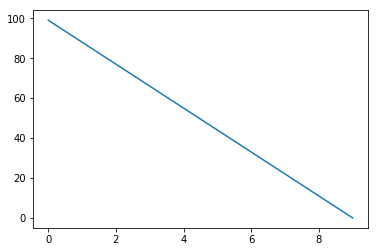

In [3]:
# A simple line plot
x_coordinates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # or np.arange(10)
y_coordinates = np.array([99, 88, 77, 66, 55, 44, 33, 22, 11, 0])
plt.plot(x_coordinates, y_coordinates)

# 2. Colors, markers, and line styles

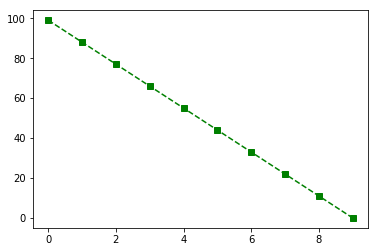

In [4]:
# A green broken line with square marker
plt.plot(x_coordinates, y_coordinates, color='g', marker='s', linestyle='--')

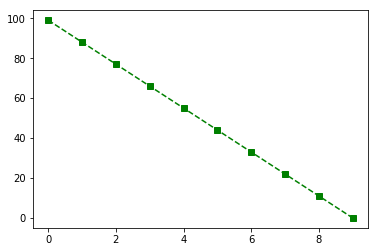

In [10]:
# Use a single string
plt.plot(x_coordinates, y_coordinates, 'gs--')

Here you can find many options for color, marker, and line style:
- [Colors](https://matplotlib.org/2.0.2/api/colors_api.html)
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Line styles](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

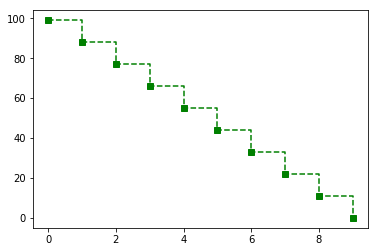

In [12]:
# Step curve
plt.plot(x_coordinates, y_coordinates, 'gs--', drawstyle='steps-post')

# 3. Subplots
Matplotlib plots reside within a Figure object created by `plt.figure()`. A new subplot can be added using statement `ax = fig.add_subplot(a, b, c)`, where:
- a: number of rows
- b: number of columns
- c: number of current plot

In [45]:
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data.tail(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2019-09-30,8314.62,8372.24,7736.96,8065.26,50440.10,4.072509e+08
2019-10-01,8326.64,8537.60,8212.01,8314.62,42368.00,3.554463e+08
2019-10-02,8282.43,8358.08,8186.30,8326.64,15082.15,1.248196e+08


<BarContainer object of 3 artists>

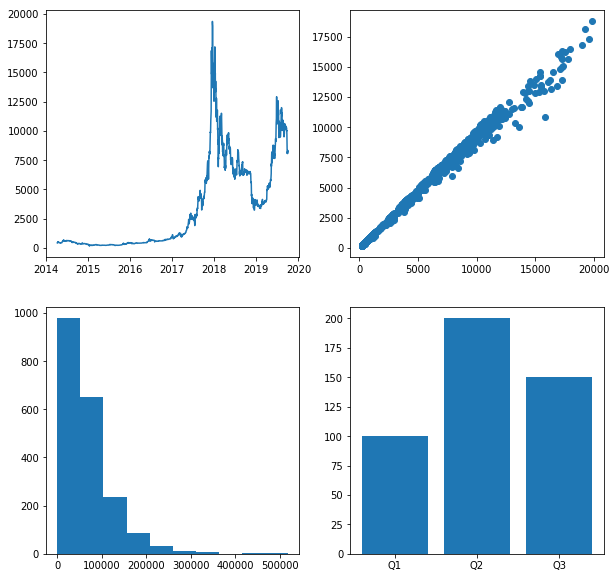

In [74]:
fig = plt.figure(figsize=(10, 10))

# plot close price vs. time
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(data.index, data['close'])

# plot high vs. low
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(data['high'], data['low'])

# plot a histogram on volume from
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(data['volumefrom'])

# plot a histogram on volume to
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(['Q1', 'Q2', 'Q3'], [100, 200, 150])

# 4. Ticks, labels, and legends


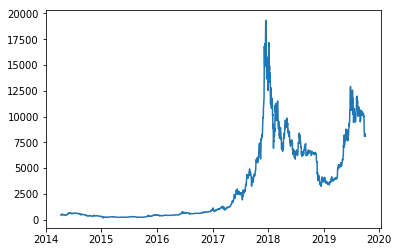

In [56]:
# plot close price vs. time
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])

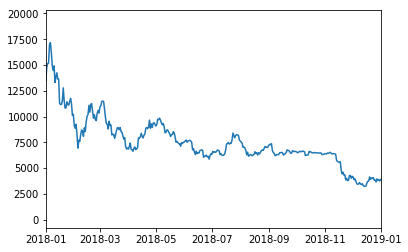

In [60]:
# Only show 2018 - 2019
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([datetime(2018, 1, 1), datetime(2019, 1, 1)])
ax.plot(data.index, data['close'])

[Text(0,0,'2018Q1'),
 Text(0,0,'2018Q2'),
 Text(0,0,'2018Q3'),
 Text(0,0,'2018Q4'),
 Text(0,0,'2019Q1')]

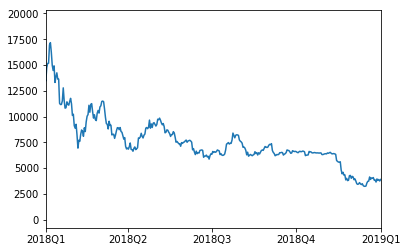

In [63]:
# Change tickes to quarters
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])
ax.set_xlim([datetime(2018, 1, 1), datetime(2019, 1, 1)])
ax.set_xticks([datetime(2018, 1, 1),
                datetime(2018, 4, 1),
                datetime(2018, 7, 1),
                datetime(2018, 10, 1), 
                datetime(2019, 1, 1)])
ax.set_xticklabels(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1'])

Text(0.5,1,'Bitcoin Price')

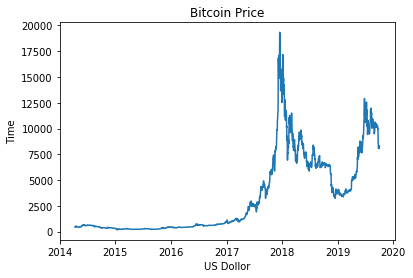

In [64]:
# Set x and y label
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])
ax.set_xlabel("US Dollor")
ax.set_ylabel("Time")
ax.set_title("Bitcoin Price")

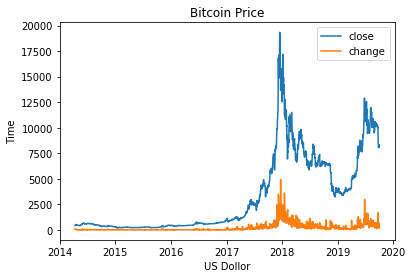

In [69]:
# Set x and y label
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'], label="close")
ax.plot(data.index, data['high'] - data['low'], label='change')
ax.set_xlabel("US Dollor")
ax.set_ylabel("Time")
ax.set_title("Bitcoin Price")
ax.legend()

# 5. Save plots

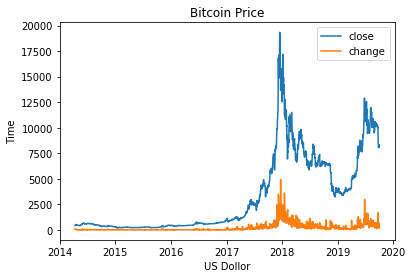

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'], label="close")
ax.plot(data.index, data['high'] - data['low'], label='change')
ax.set_xlabel("US Dollor")
ax.set_ylabel("Time")
ax.set_title("Bitcoin Price")
ax.legend()
os.mkdir("images")
plt.savefig("images/BitcoinPrice.png")

# Exercise: Exploring NYC Taxi Data
Please download train.zip from [Kaggle]()